In [1]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from urllib.request import urlopen
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
p = inflect.engine()
lemmatizer = WordNetLemmatizer()

In [3]:
def read_book(url):
  return urlopen(url).read()

In [4]:
def print_book_title_and_length(book):
  print(book[:75],len(book))

In [5]:
def decode_book(book):
  return book.decode('utf-8')

In [6]:
def discard_useless_part (text):
  sidx = text.find('*** START OF THIS PROJECT ')
  eidx = text.find('*** END OF THIS PROJECT ')
  print("Discarding Before - ", sidx)
  print("Discarding After - ", eidx)
  text = text[sidx:eidx]
  return text

In [7]:
def to_lower(text):
  return text.lower()

In [8]:
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

In [9]:
def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [10]:
def num2word(text):
  list_of_words = text.split()
  modified_text = []

  for word in list_of_words:
    if word.isdigit():
      number_in_word = p.number_to_words(word)
      modified_text.append(number_in_word)
    else:
      modified_text.append(word)
      
  return ' '.join(modified_text)

In [11]:
def remove_punctuation(text):
  tokens = word_tokenize(text)
  words = [word for word in tokens if word.isalpha()]
  return ' '.join(words)

In [12]:
def lemmatize_word(text): 
    word_tokens = word_tokenize(text)  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas) 
  

In [13]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [14]:
url1 = 'http://www.gutenberg.org/files/1342/1342-0.txt'
url2 = 'http://www.gutenberg.org/files/98/98-0.txt'

def PreProcessedBook(url):
  book = read_book(url)
  print_book_title_and_length(book)
  text = decode_book(book)
  text = discard_useless_part(text)
  text = to_lower(text)
  text = remove_URL(text)
  text = decontracted(text)
  text = num2word(text)
  text = remove_punctuation(text)
  text = lemmatize_word(text)
  return (text)


b'\xef\xbb\xbf\r\nThe Project Gutenberg EBook of Pride and Prejudice, by Jane Austen\r\n\r\n' 799738
Discarding Before -  519
Discarding After -  771251


In [19]:
book1 = read_book(url1)
print(book1[:2000])

b'\xef\xbb\xbf\r\nThe Project Gutenberg EBook of Pride and Prejudice, by Jane Austen\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Pride and Prejudice\r\n\r\nAuthor: Jane Austen\r\n\r\nRelease Date: August 26, 2008 [EBook #1342]\r\nLast Updated: November 12, 2019\r\n\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***\r\n\r\n\r\n\r\n\r\nProduced by Anonymous Volunteers, and David Widger\r\n\r\nTHERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK\r\n[# 42671 ]\r\n\r\ncover\r\n\r\n\r\n\r\n\r\n      Pride and Prejudice\r\n\r\n      By Jane Austen\r\n\r\n        CONTENTS\r\n\r\n         Chapter 1\r\n\r\n         Chapter 2\r\n\r\n         Chapter 3\r\n\r\n  

In [15]:
book1_text = PreProcessedBook(url1)
book2_text = PreProcessedBook(url2)

b'\xef\xbb\xbf\r\nThe Project Gutenberg EBook of Pride and Prejudice, by Jane Austen\r\n\r\n' 799738
Discarding Before -  519
Discarding After -  771251
b'\xef\xbb\xbfThe Project Gutenberg EBook of A Tale of Two Cities, by Charles Dickens\r' 804335
Discarding Before -  591
Discarding After -  773925


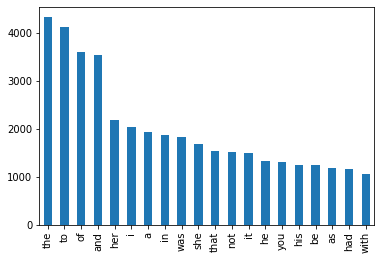

In [ ]:
word_tokens1 = word_tokenize(book1_text) 
pd.Series(word_tokens1).value_counts()[:20].plot(kind='bar')

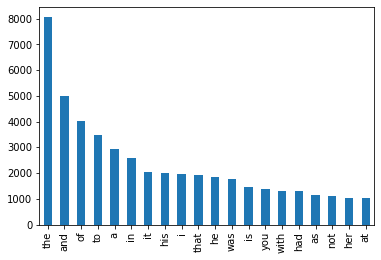

In [ ]:
word_tokens2 = word_tokenize(book2_text) 
pd.Series(word_tokens2).value_counts()[:20].plot(kind='bar')

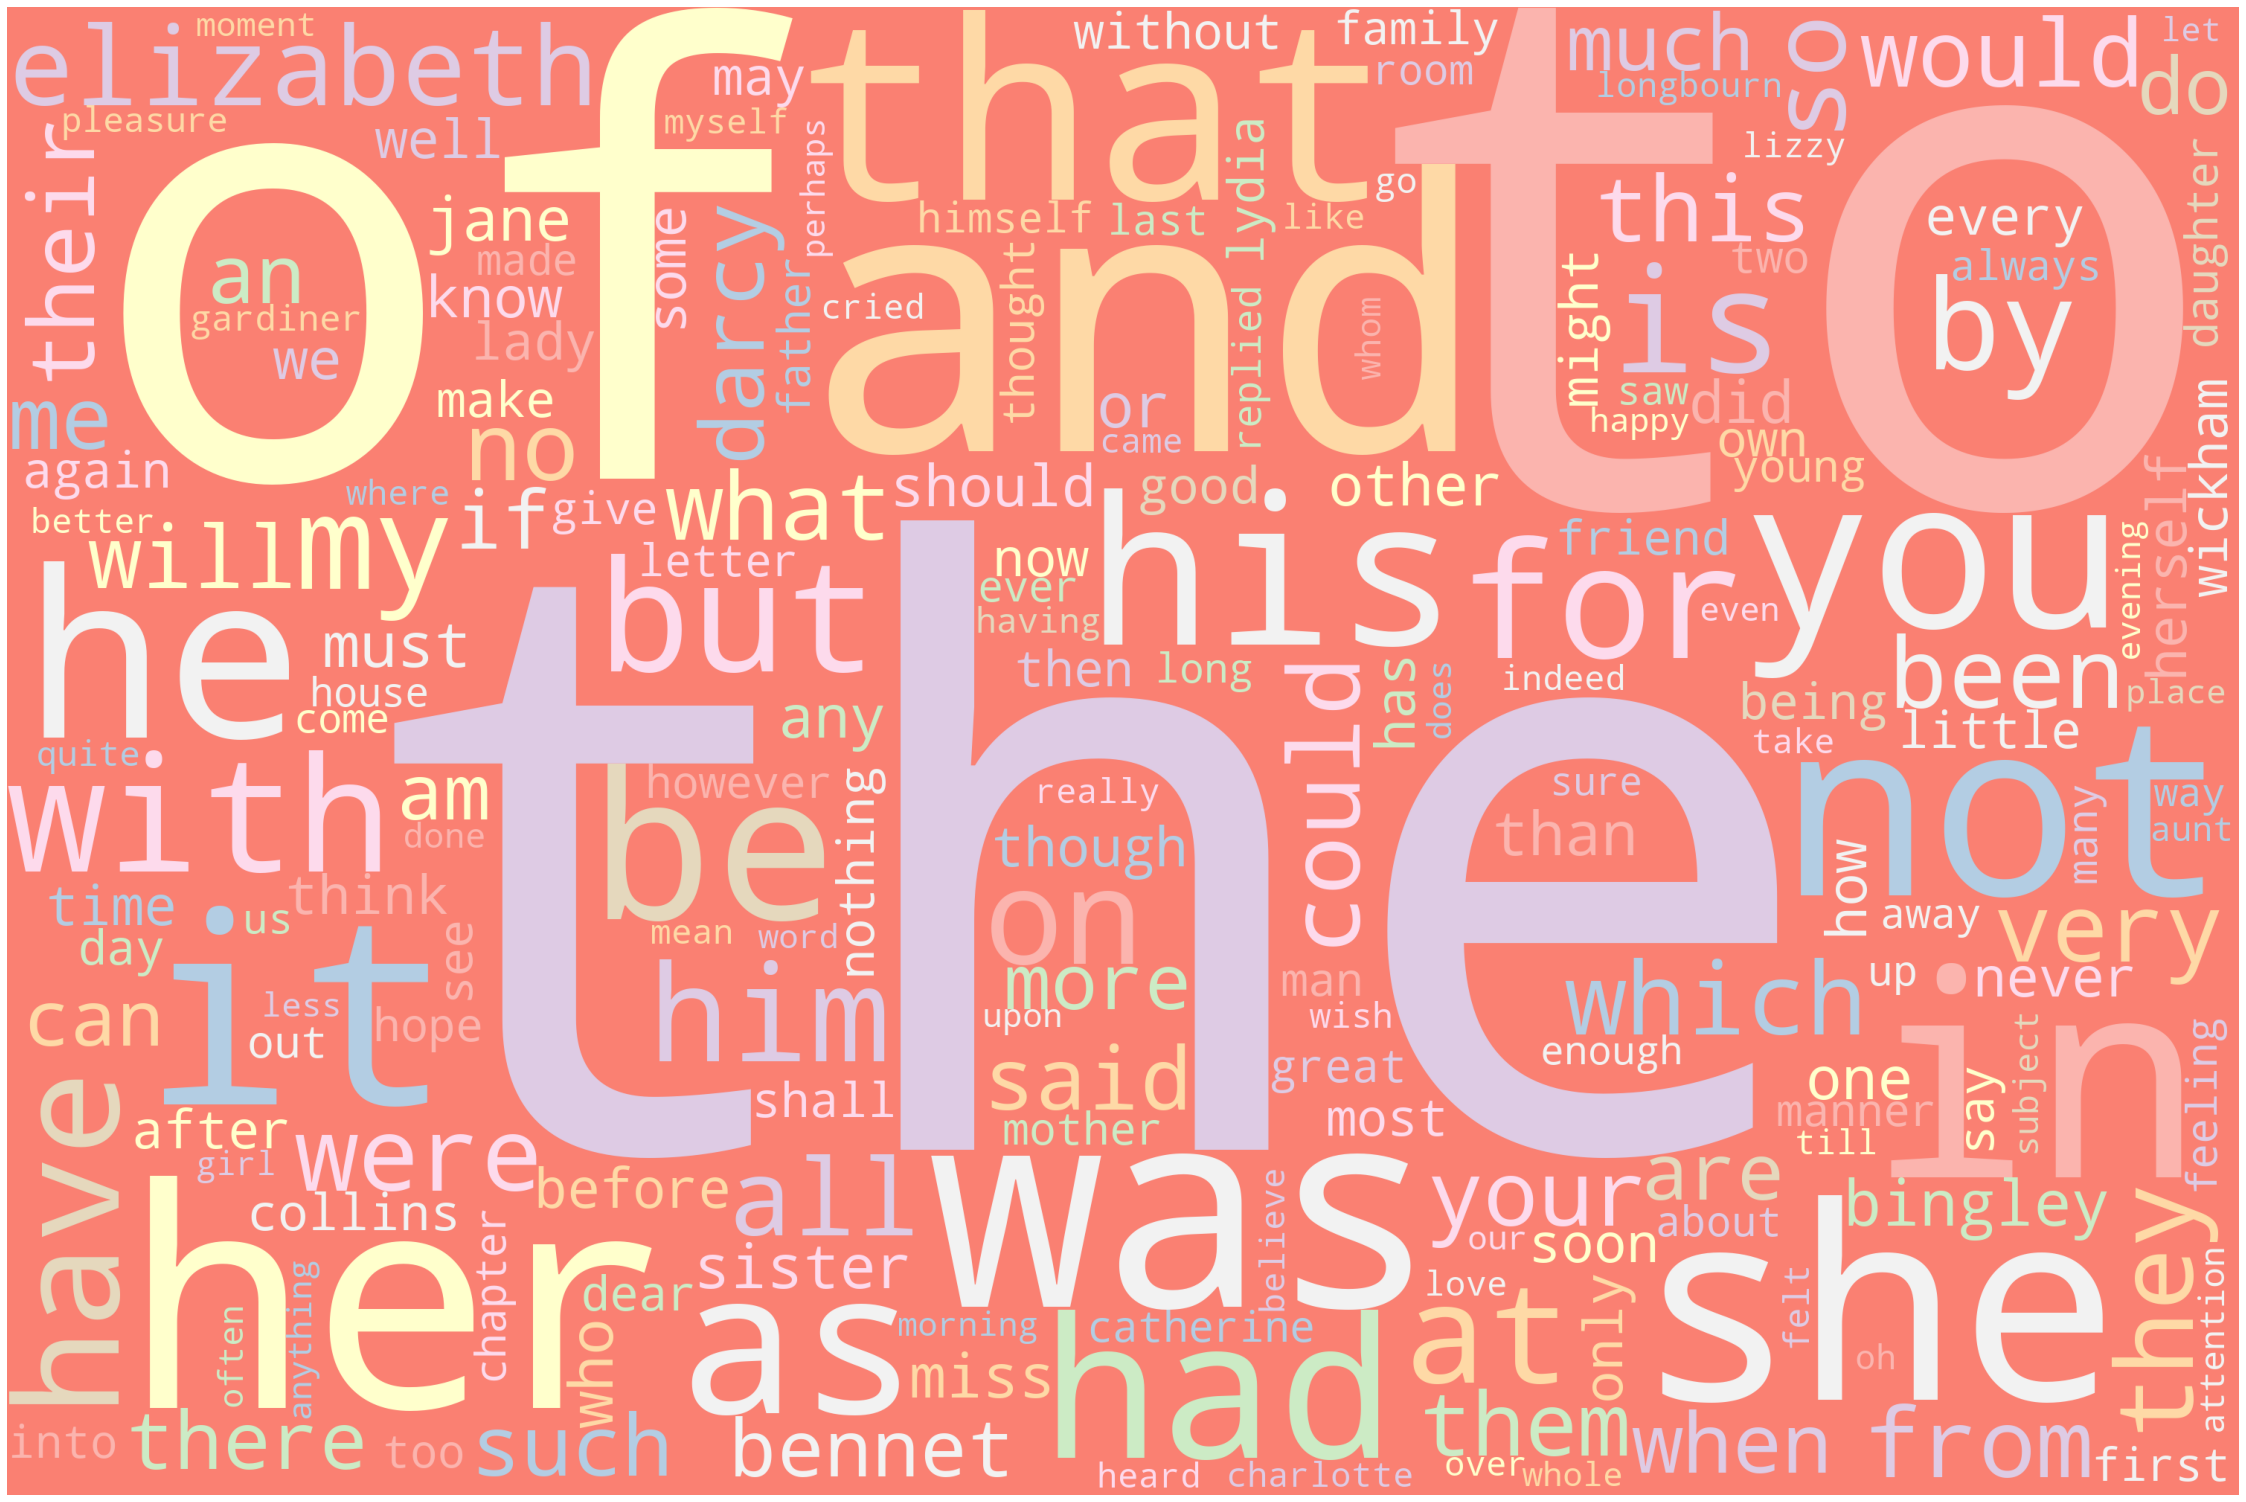

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(word_tokens1))
# Plot
plot_cloud(wordcloud)

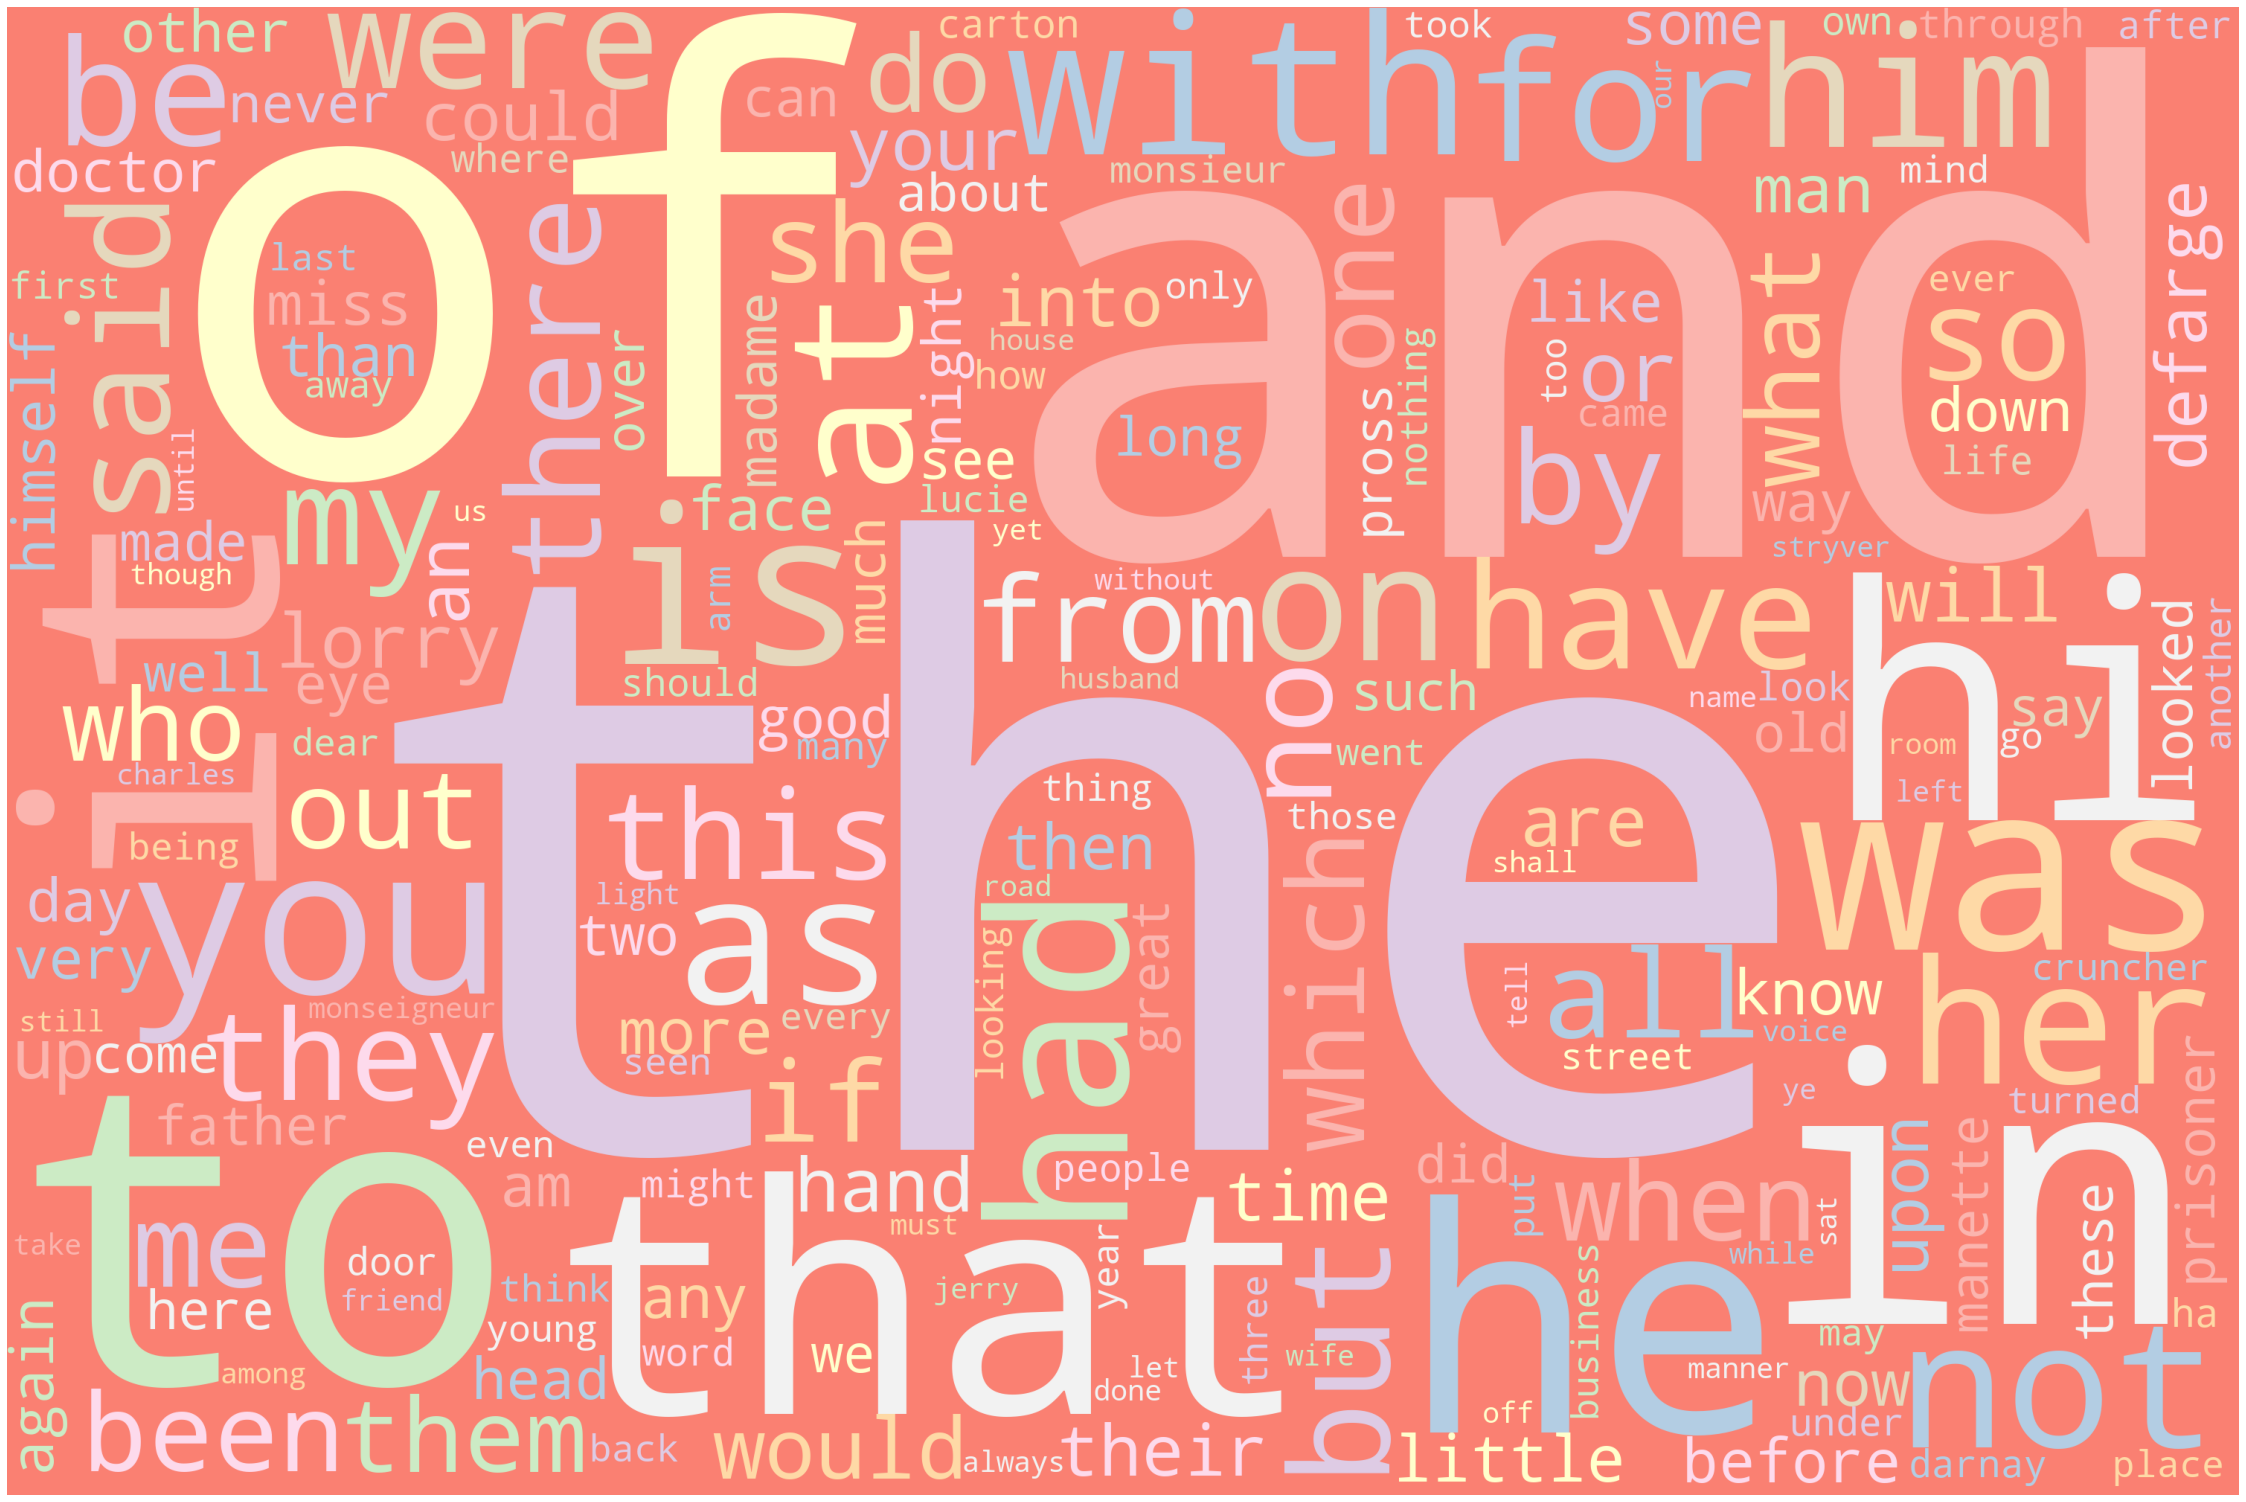

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(word_tokens2))
# Plot
plot_cloud(wordcloud)

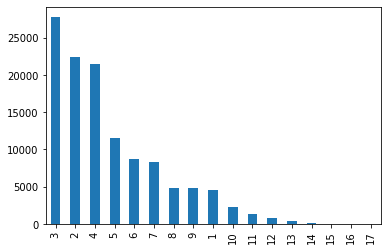

In [ ]:
length_1 = [len(word) for word in word_tokens1]
pd.Series(length_1).value_counts()[:20].plot(kind='bar')

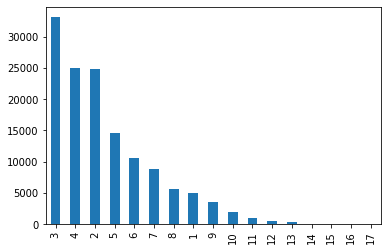

In [ ]:
length_2 = [len(word) for word in word_tokens2]
pd.Series(length_2).value_counts()[:20].plot(kind='bar')

In [ ]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in STOPWORDS]

In [ ]:
word_tokens1 = remove_stopwords(word_tokens1)
word_tokens2 = remove_stopwords(word_tokens2)

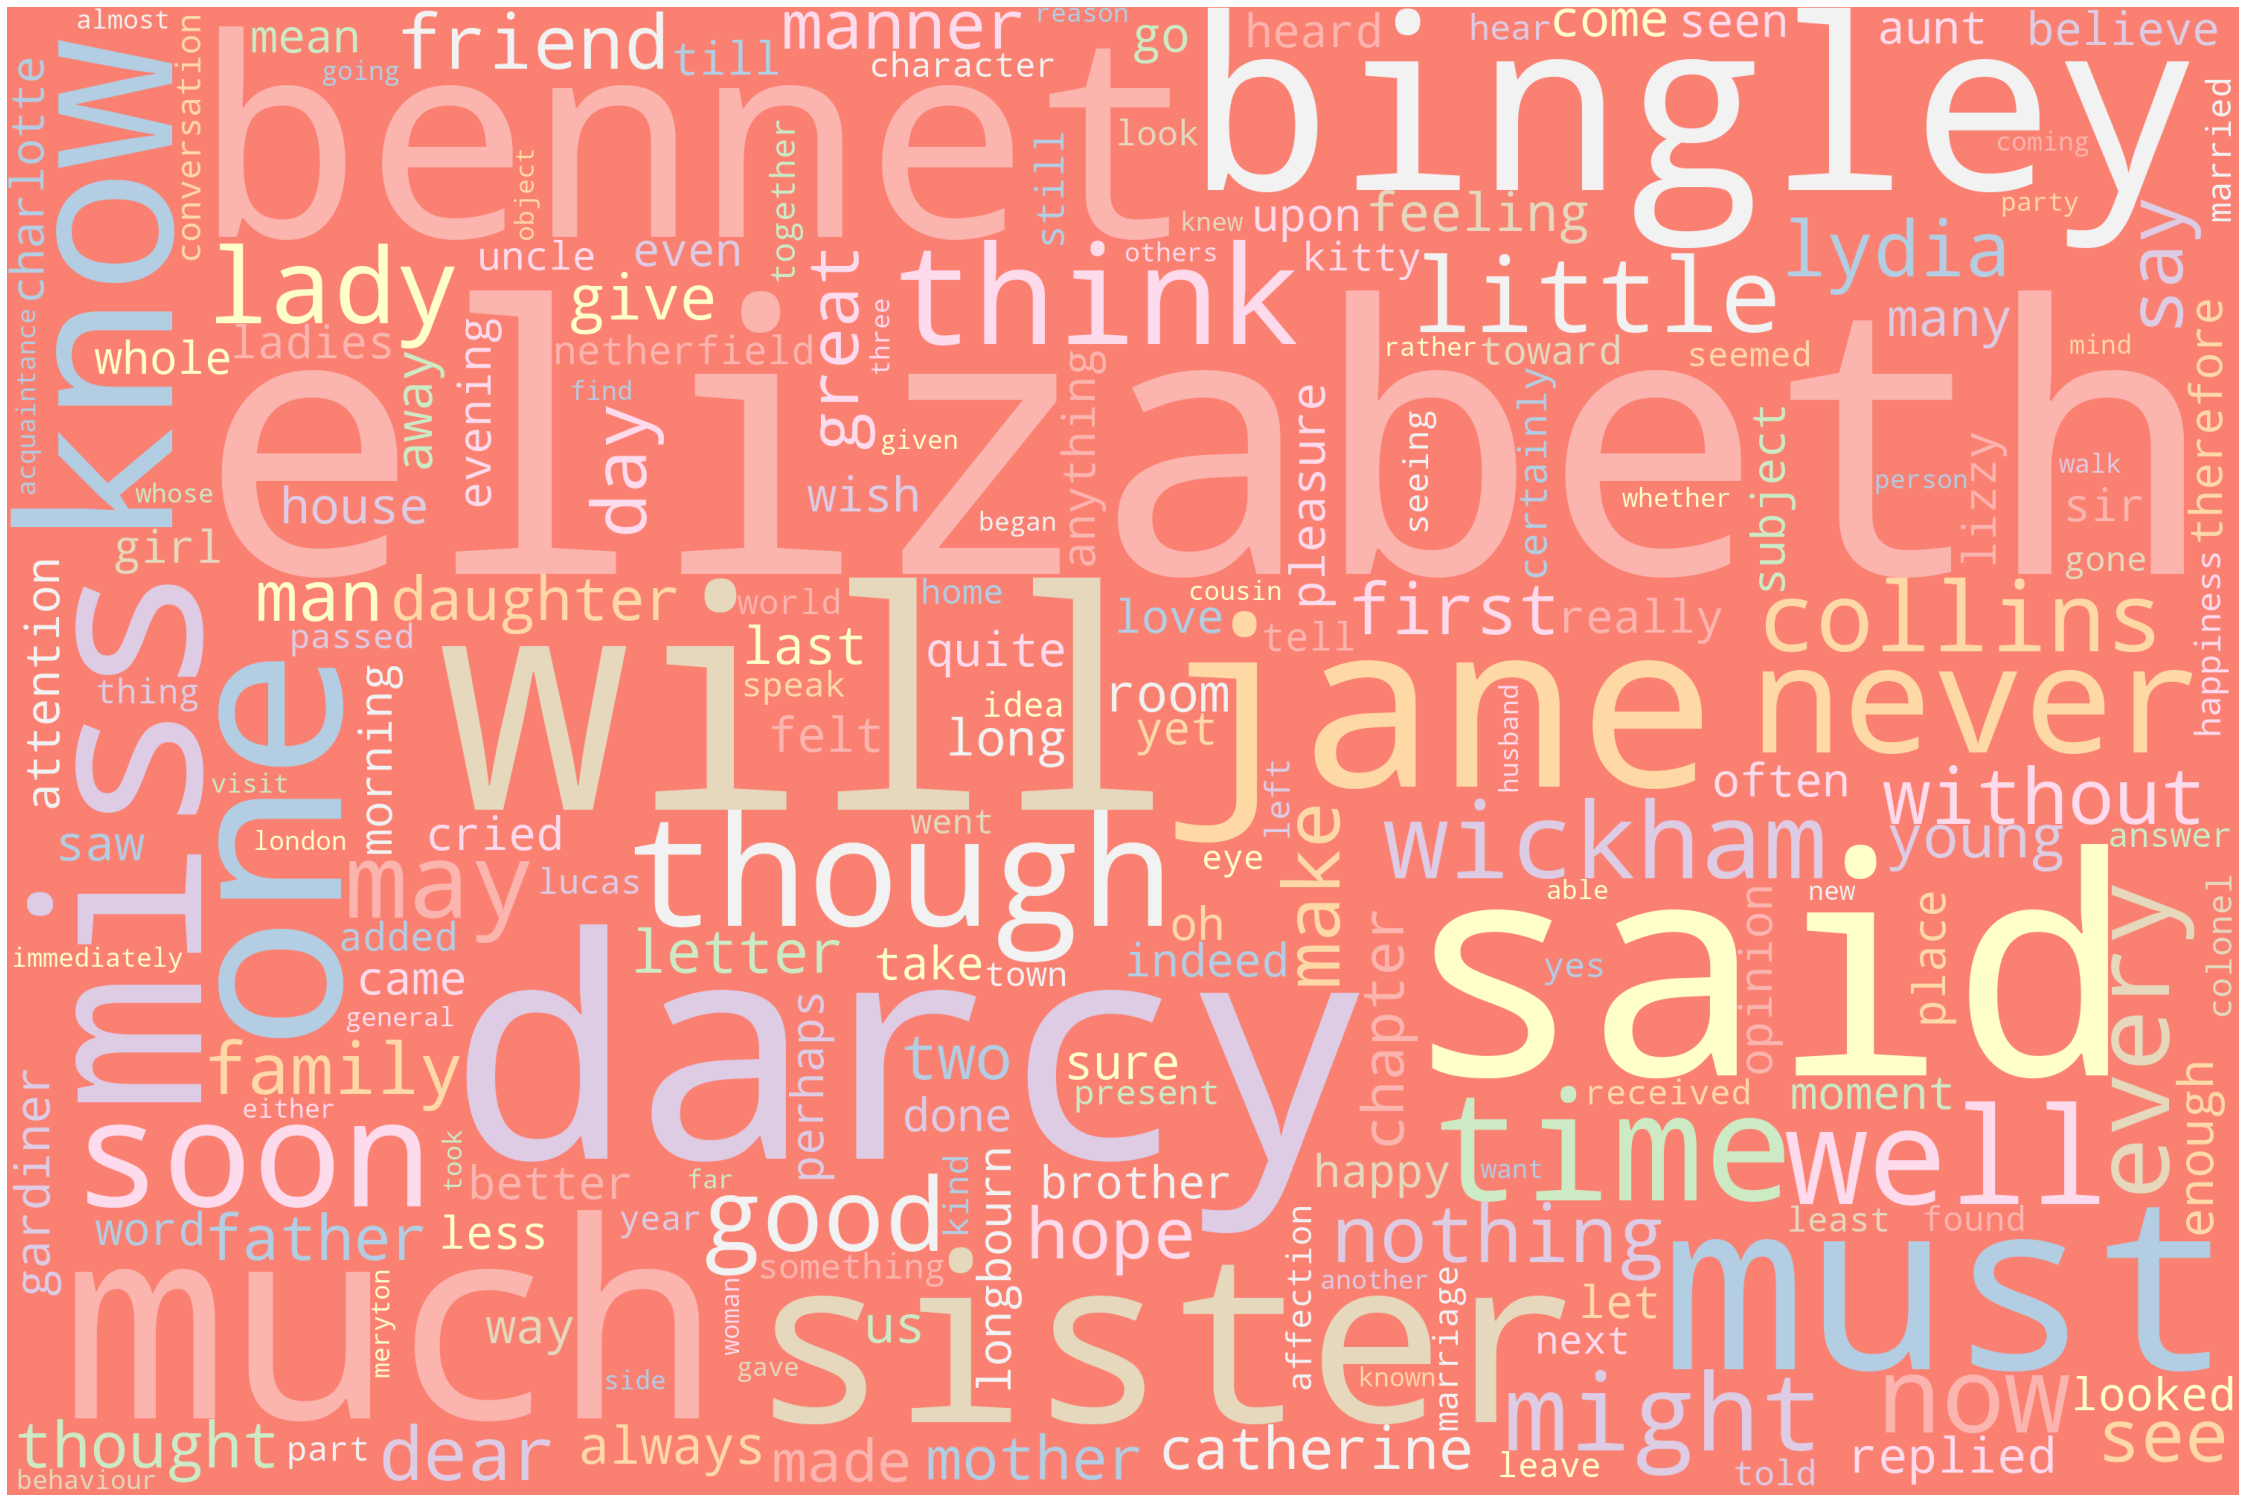

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(word_tokens1))
# Plot
plot_cloud(wordcloud)

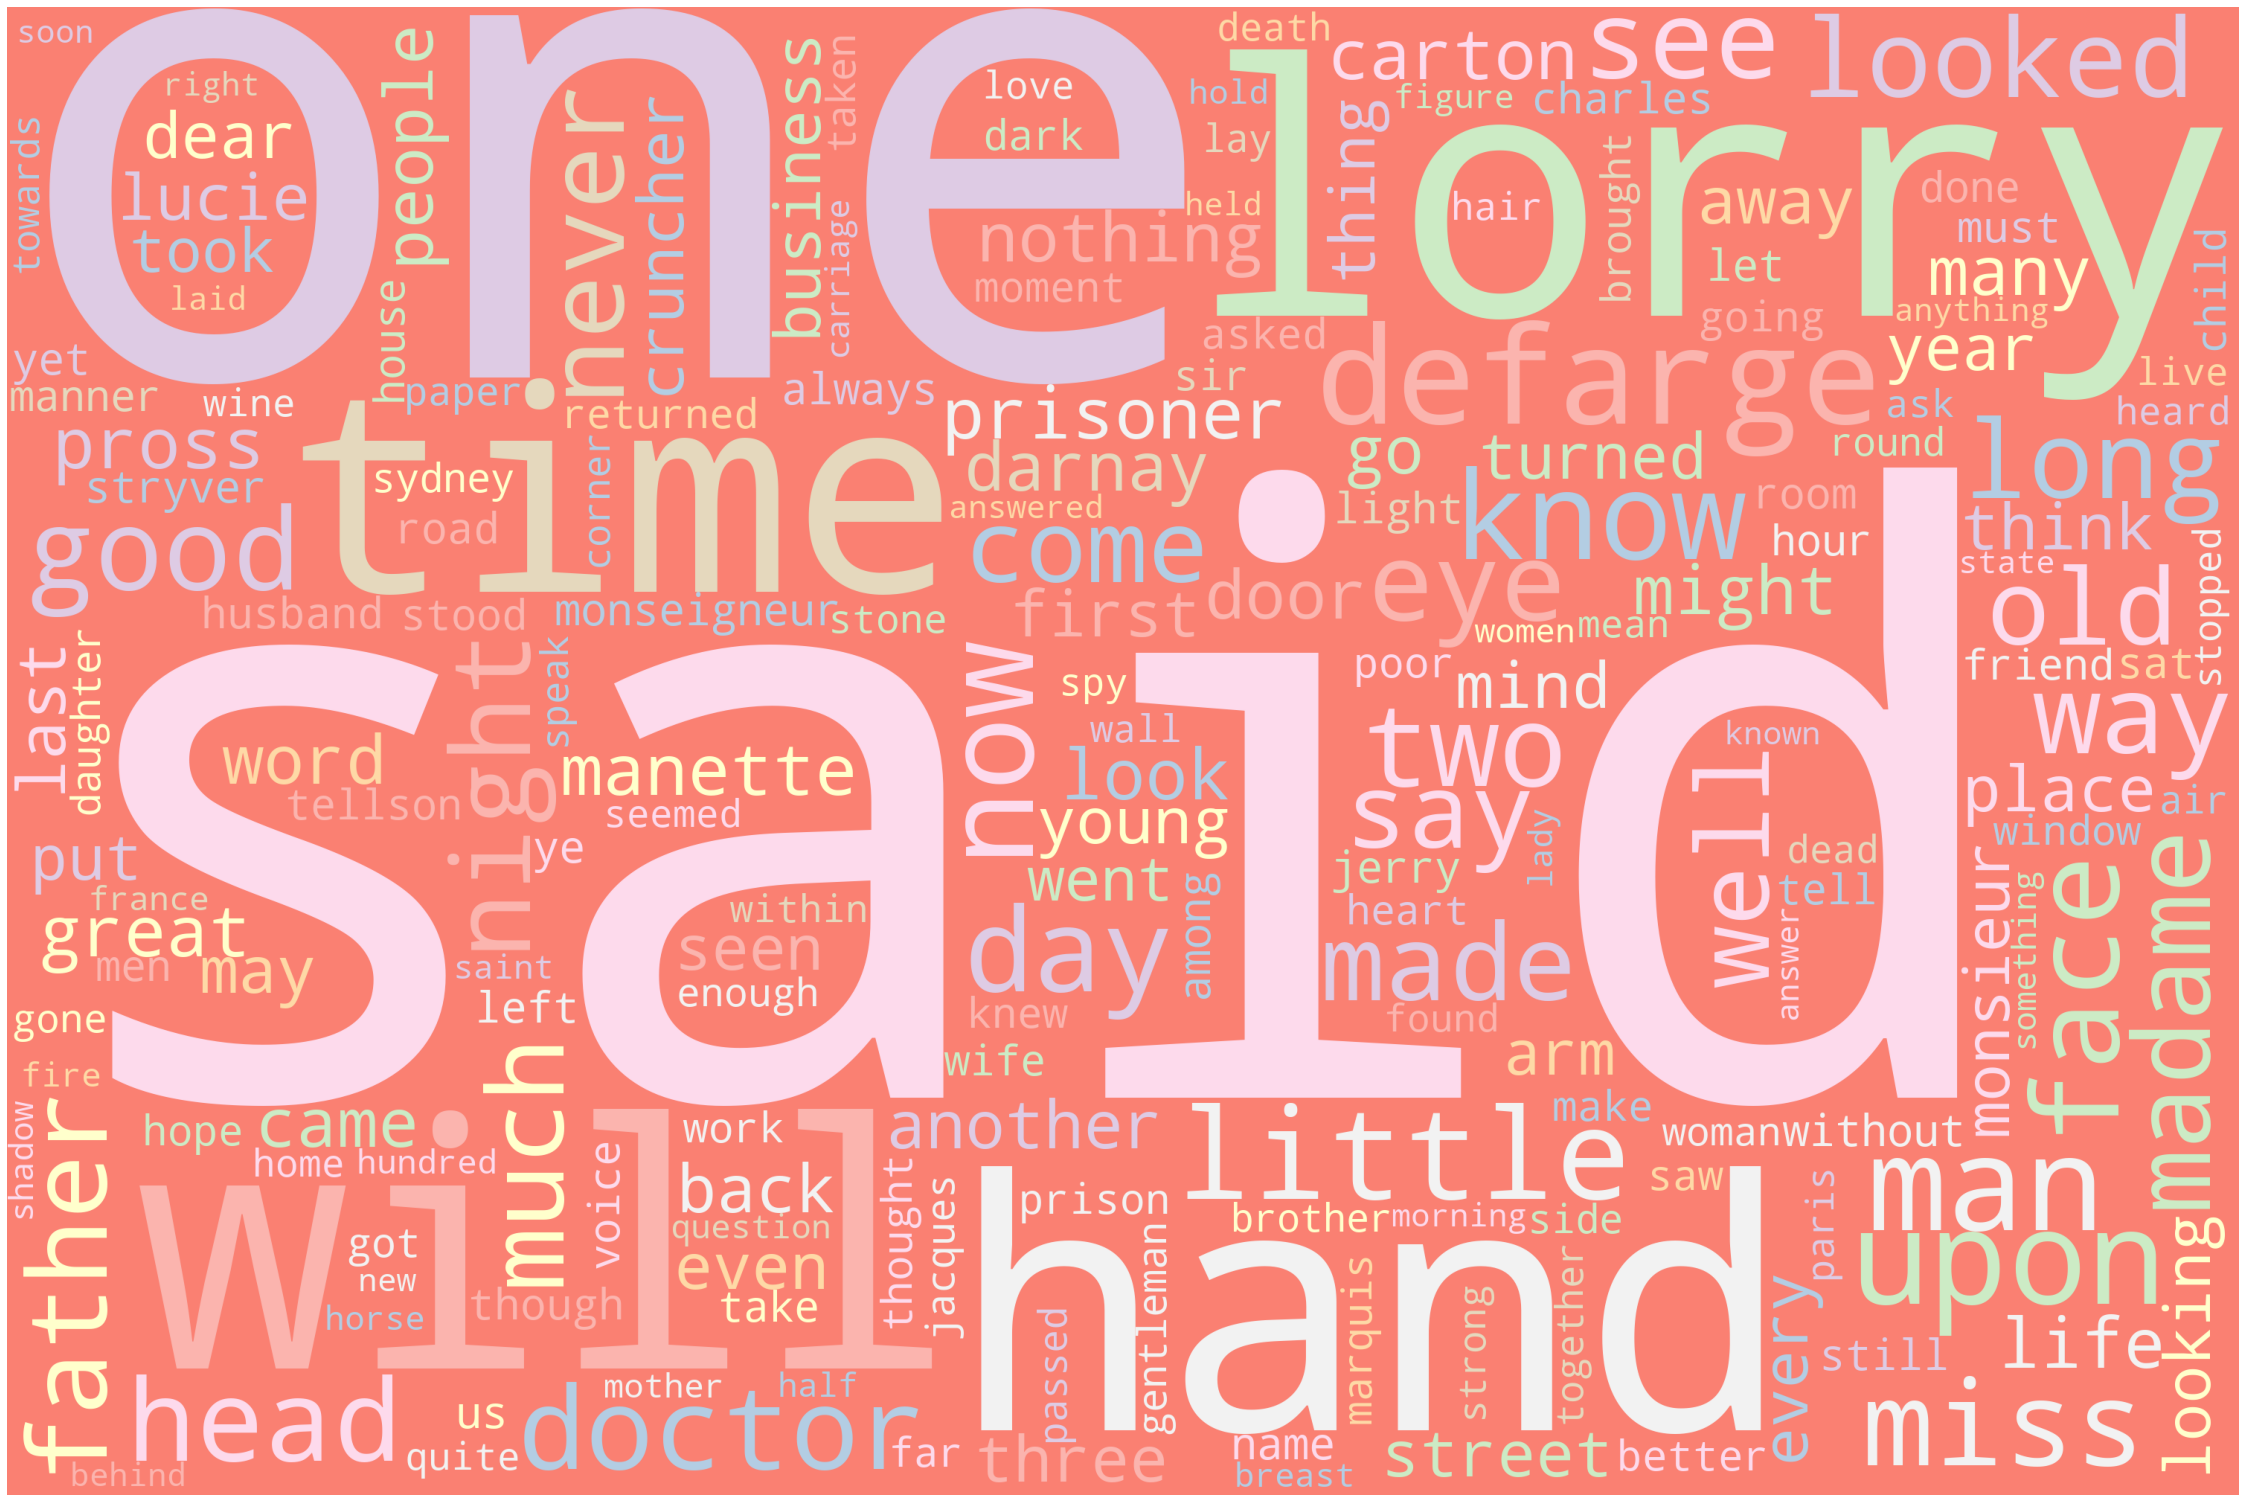

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(word_tokens2))
# Plot
plot_cloud(wordcloud)

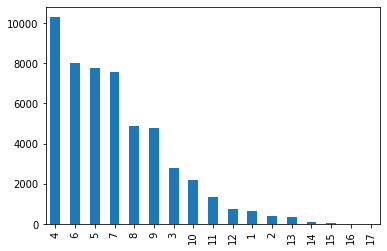

In [ ]:
length_1 = [len(word) for word in word_tokens1]
pd.Series(length_1).value_counts()[:20].plot(kind='bar')

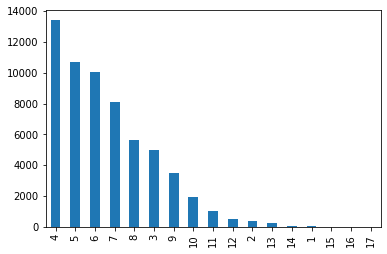

In [ ]:
length_2 = [len(word) for word in word_tokens2]
pd.Series(length_2).value_counts()[:20].plot(kind='bar')

In [ ]:
from collections import Counter

In [ ]:
def tag_treebank(text):
  tokenized=nltk.word_tokenize(text)
  tagged=nltk.pos_tag(tokenized)
  return tagged

In [ ]:
from collections import Counter
def get_counts(tags):
  counts = Counter( tag for word,  tag in tags)
  return counts

In [ ]:
book1_tags=tag_treebank(book1_text)
book1_pos_count=get_counts(book1_tags)
book2_tags=tag_treebank(book2_text)
book2_pos_count=get_counts(book2_tags)

In [ ]:
len(book1_pos_count)

31

In [ ]:
book2_pos_count

Counter({"''": 1,
         'CC': 6065,
         'CD': 925,
         'DT': 14343,
         'EX': 401,
         'FW': 29,
         'IN': 18223,
         'JJ': 9592,
         'JJR': 391,
         'JJS': 224,
         'MD': 1808,
         'NN': 23102,
         'NNP': 18,
         'NNS': 5139,
         'PDT': 201,
         'PRP': 8987,
         'PRP$': 4506,
         'RB': 7758,
         'RBR': 217,
         'RBS': 53,
         'RP': 746,
         'TO': 3476,
         'UH': 20,
         'VB': 5157,
         'VBD': 9082,
         'VBG': 2601,
         'VBN': 4188,
         'VBP': 2810,
         'VBZ': 2265,
         'WDT': 807,
         'WP': 828,
         'WP$': 46,
         'WRB': 826})